In [1]:
# ---------------------------------------------------------------------------- #
#                                     SETUP                                    #
# ---------------------------------------------------------------------------- #

# -------------------------------- Importações ------------------------------- #
import spacy
import pandas as pd
import regex as re
import os
from periodictable import elements
from matplotlib import pyplot as plt

# ------------------------ Carregando dados coletados ------------------------ #
directory = "prvsk_data"
files = os.listdir(directory)
dfs = []
for file in files:
    df = pd.read_excel(os.path.join(directory, file))
    dfs.append(df)

data = pd.concat(dfs, ignore_index=True)

# ----------------- Carregando um modelo estatístico (spaCy) ----------------- #
nlp = spacy.load('en_core_web_sm')

In [2]:
# ---------------------------------------------------------------------------- #
#                                 SPACY + REGEX                                #
# ---------------------------------------------------------------------------- #

# -------------- Loop que salva cada fórmula de perovskita ABX3 -------------- #
perovskites = []

i = -1
for abstract in data['Abstract']:
    i += 1
    doc = nlp(str(abstract))
    for sentence in doc.sents:
        composition = re.findall(r"\b(?:[A-Z][a-z]?(?:\d+(?:\.\d*)?|\.\d+)?){2}[A-Z][a-z]?(?:\d+(?:\.\d*)?|\.\d+)?3\b", str(sentence))
        if len(composition) != 0:
            perovskites.extend(set(composition))
            print('No Abstract', i, 'foi encontrada a composição:', composition)
            # print('Sentença de extração do abstract', i, ':', sentence)
            # NOTA: esse loop não considera repetições em um mesmo artigo!!!! 

No Abstract 8 foi encontrada a composição: ['ABC3']
No Abstract 10 foi encontrada a composição: ['CsPbBr3']
No Abstract 13 foi encontrada a composição: ['BaTiO3', 'BaTiO3']
No Abstract 13 foi encontrada a composição: ['BaTiO3', 'BaTiO3', 'BaTiO3']
No Abstract 13 foi encontrada a composição: ['BaTiO3']
No Abstract 13 foi encontrada a composição: ['BaTiO3']
No Abstract 17 foi encontrada a composição: ['CsPbX3']
No Abstract 17 foi encontrada a composição: ['CsBX3']
No Abstract 17 foi encontrada a composição: ['CsBCl3']
No Abstract 18 foi encontrada a composição: ['Bi0.5TiO3']
No Abstract 23 foi encontrada a composição: ['CsPbBr3']
No Abstract 23 foi encontrada a composição: ['CsPbBr3', 'CsPbBr3']
No Abstract 23 foi encontrada a composição: ['CsPbBr3']
No Abstract 23 foi encontrada a composição: ['CsPbBr3']
No Abstract 23 foi encontrada a composição: ['CsPbBr3']
No Abstract 24 foi encontrada a composição: ['CsSnI3']
No Abstract 24 foi encontrada a composição: ['CsSnI3']
No Abstract 24 foi 

In [3]:
# ---------------------------------------------------------------------------- #
#                       FILTRANDO APENAS ELEMENTOS REAIS                       #
# ---------------------------------------------------------------------------- #

# ------------------- Criando lista de elementos existentes ------------------ #
element_list = [element.symbol for element in elements if element.symbol][1:]

# --------- Checando se as perovskitas possuem apenas elementos reais -------- #
prvskt_total = []
elements_total = []

for formula in perovskites:
    prvsk_elements = re.findall(r'[A-Z][a-z]*', formula)
    if all(symbol in element_list for symbol in prvsk_elements):
        prvskt_total.append(formula)
        elements_total.extend(prvsk_elements)

Foram encontradas 9479 fórmulas, das quais 635 são únicas: {'KIrF3', 'NiMnO3', 'BaHfO3', 'CuScO3', 'K2CuCl3', 'BaPbO3', 'YBO3', 'Ba0.06TiO3', 'LaCeO3', 'CsPbI3', 'TlSrCl3', 'NaMgCl3', 'HeAlF3', 'TbFeO3', 'Li2MnO3', 'DyNiO3', 'Bi0.5TiO3', 'RbBH3', 'NaZnBr3', 'LaVO3', 'Cu2SnO3', 'HfAgO3', 'CdSnO3', 'Sr0.1ZrO3', 'AgTaO3', 'SrCoO3', 'BaCeO3', 'BaTeO3', 'WCrO3', 'Co0.2Fe0.8O3', 'Nb0.96Sb0.04O3', 'YScO3', 'NdInO3', 'ZnBiO3', 'H2PO3', 'NaRaF3', 'Sr10.8K0.2Mo3', 'CuBiO3', 'InSnCl3', 'HfAgH3', 'YWN3', 'Cs0.33WO3', 'CsSrCl3', 'HgCrO3', 'Ca1.5Ti2Nb3', 'CsPbBr3', 'ReFeO3', 'MgCrH3', 'CaZrO3', 'CsEuF3', 'KSnBr3', 'Bi0.9FeO3', 'EuHfO3', 'NdFeO3', 'GdCrO3', 'GeTiO3', 'SrCO3', 'CaCeO3', 'Li5OCl3', 'Nb0.955Sb0.045O3', 'GeZrO3', 'ScGaO3', 'LiNiH3', 'YCrO3', 'FeFeO3', 'Li2SnO3', 'BaDyO3', 'Sr0.95Ce0.05Co3', 'YAlO3', 'LaZnO3', 'LiTaO3', 'Cs0.17PbI3', 'AlBC3', 'CaSeO3', 'TlGeBr3', 'NSC113', 'NiZrO3', 'KMnCl3', 'SrSeO3', 'NaTaO3', 'NdNiO3', 'LiBaF3', 'CaTiO3', 'ScInO3', 'KMnF3', 'HeInF3', 'YFeO3', 'AgNO3', 

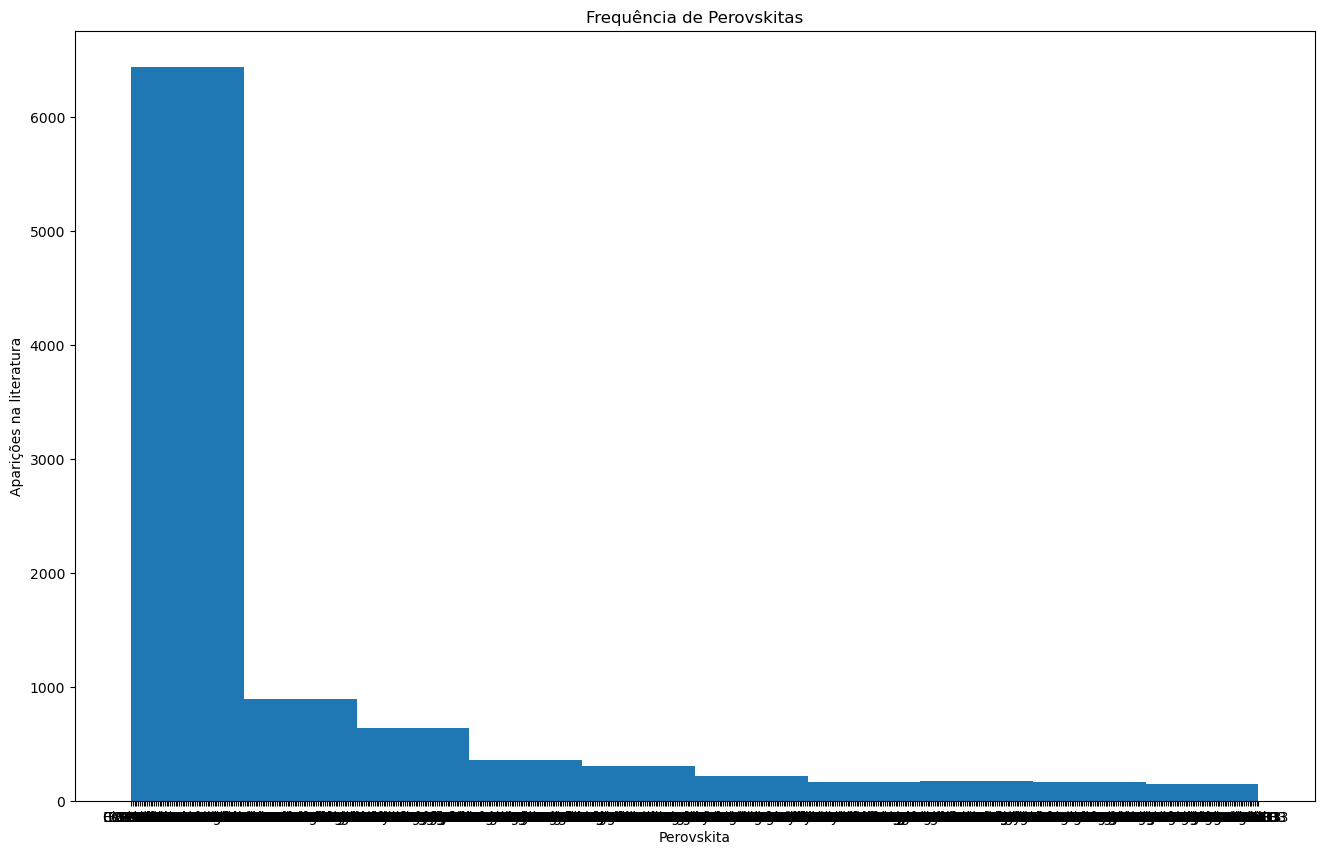

In [4]:
# ---------------------------------------------------------------------------- #
#                                  RESULTADOS                                  #
# ---------------------------------------------------------------------------- #

# ---------------------- Exibindo resultados numéricos ----------------------- #
prvskt_unique = set(prvskt_total)

print(f"Foram encontradas {len(prvskt_total)} fórmulas, das quais {len(prvskt_unique)} são únicas: {prvskt_unique}")

# -------------------------- Plotando um histograma -------------------------- #
plt.figure(figsize=(16,10))
plt.title('Frequência de Perovskitas')
plt.xlabel('Perovskita')
plt.ylabel('Aparições na literatura')
plt.hist(prvskt_total)
plt.show() 
